## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profit.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to:
- Which variables are significant in predicting the demand for shared bike
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


## Business Goal
- Model the demand for shared bikes with the available independent variables
- Help Business understand how the demand varies with Features
- Business can manipulate stratagy to meet custimer demands

## Over All Solution Steps
- Data Preparation
- Model Building
- Model Evaluation

### Step 1: Reading and Understanding Data

In [60]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
# Reading dataset
df = pd.read_csv("day.csv")

In [7]:
#convert season to categorical
# Map numerical values to season names
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df.shape

(730, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


In [11]:
# categorising columns in numerical vs categorical columns
cat_cols = ['season', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
num_cols = ['yr','temp', 'atemp', 'hum', 'windspeed', 'cnt']
# ignoring some columns
# instant: is index column
# dteday: 'yr', 'mnth', 'holiday', 'weekday','workingday' are already there
# casual, registered: cnt is sum of casual and registerd. Also these are target variables and not features
drop_cols = ["instant", "dteday",'casual', 'registered'] 

In [12]:
# drop cols
df = df.drop(columns=drop_cols)

In [13]:
df[num_cols].describe()

,yr,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Observation
- Some variables have linear relation with cnt, hence Linear Regression does makes sense

### Step 2: Visualising the Data

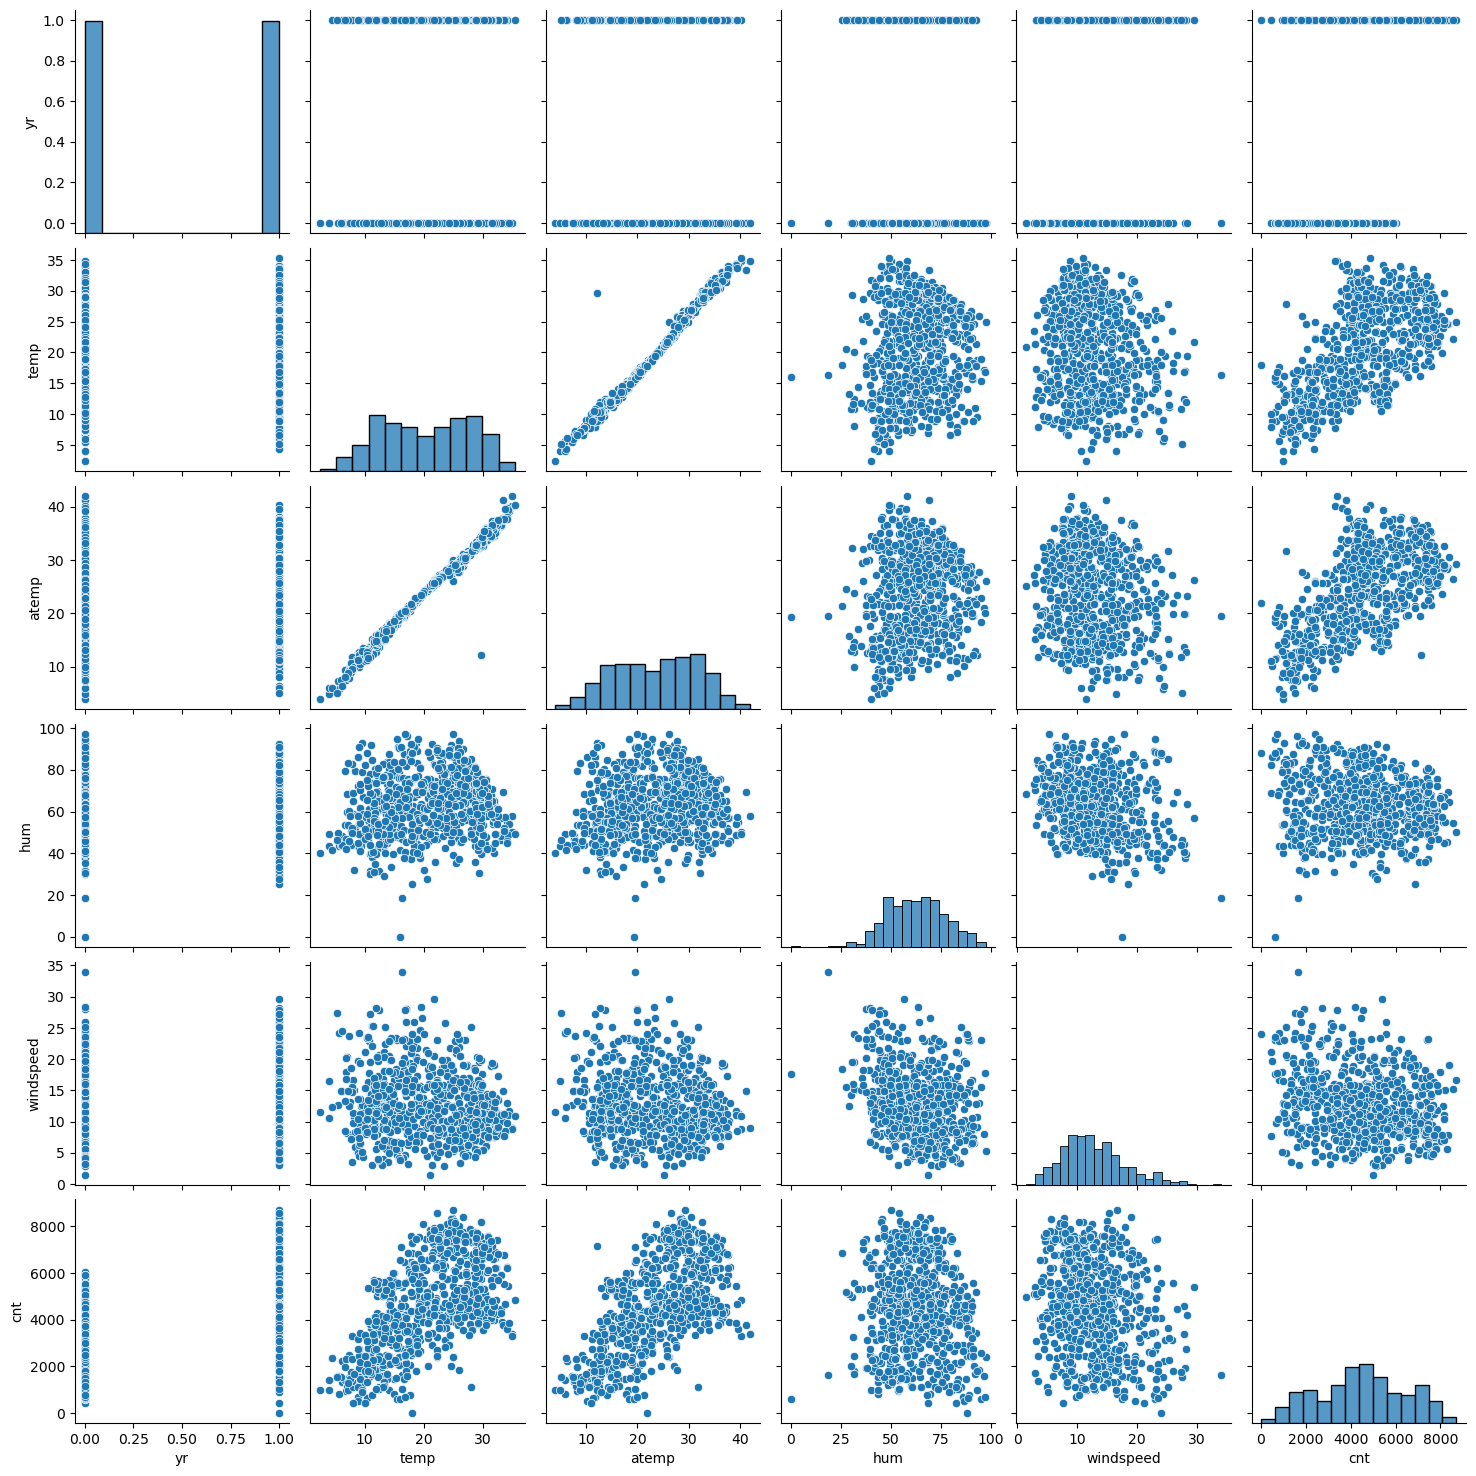

In [16]:
# numerical variables
sns.pairplot(df[num_cols])
plt.show()

### Numerical Cols observations:
- cnt distribution seems to be normal
- cnt seems to have a linear relation with temm and atemp
- hum and windspeed does not seems to be related to cnt
- temp and atemp seems to be co linear, so one needs to be dropped
- Looking at the plots Linear regression is good as some variance in cnt can be explained by numerical variables

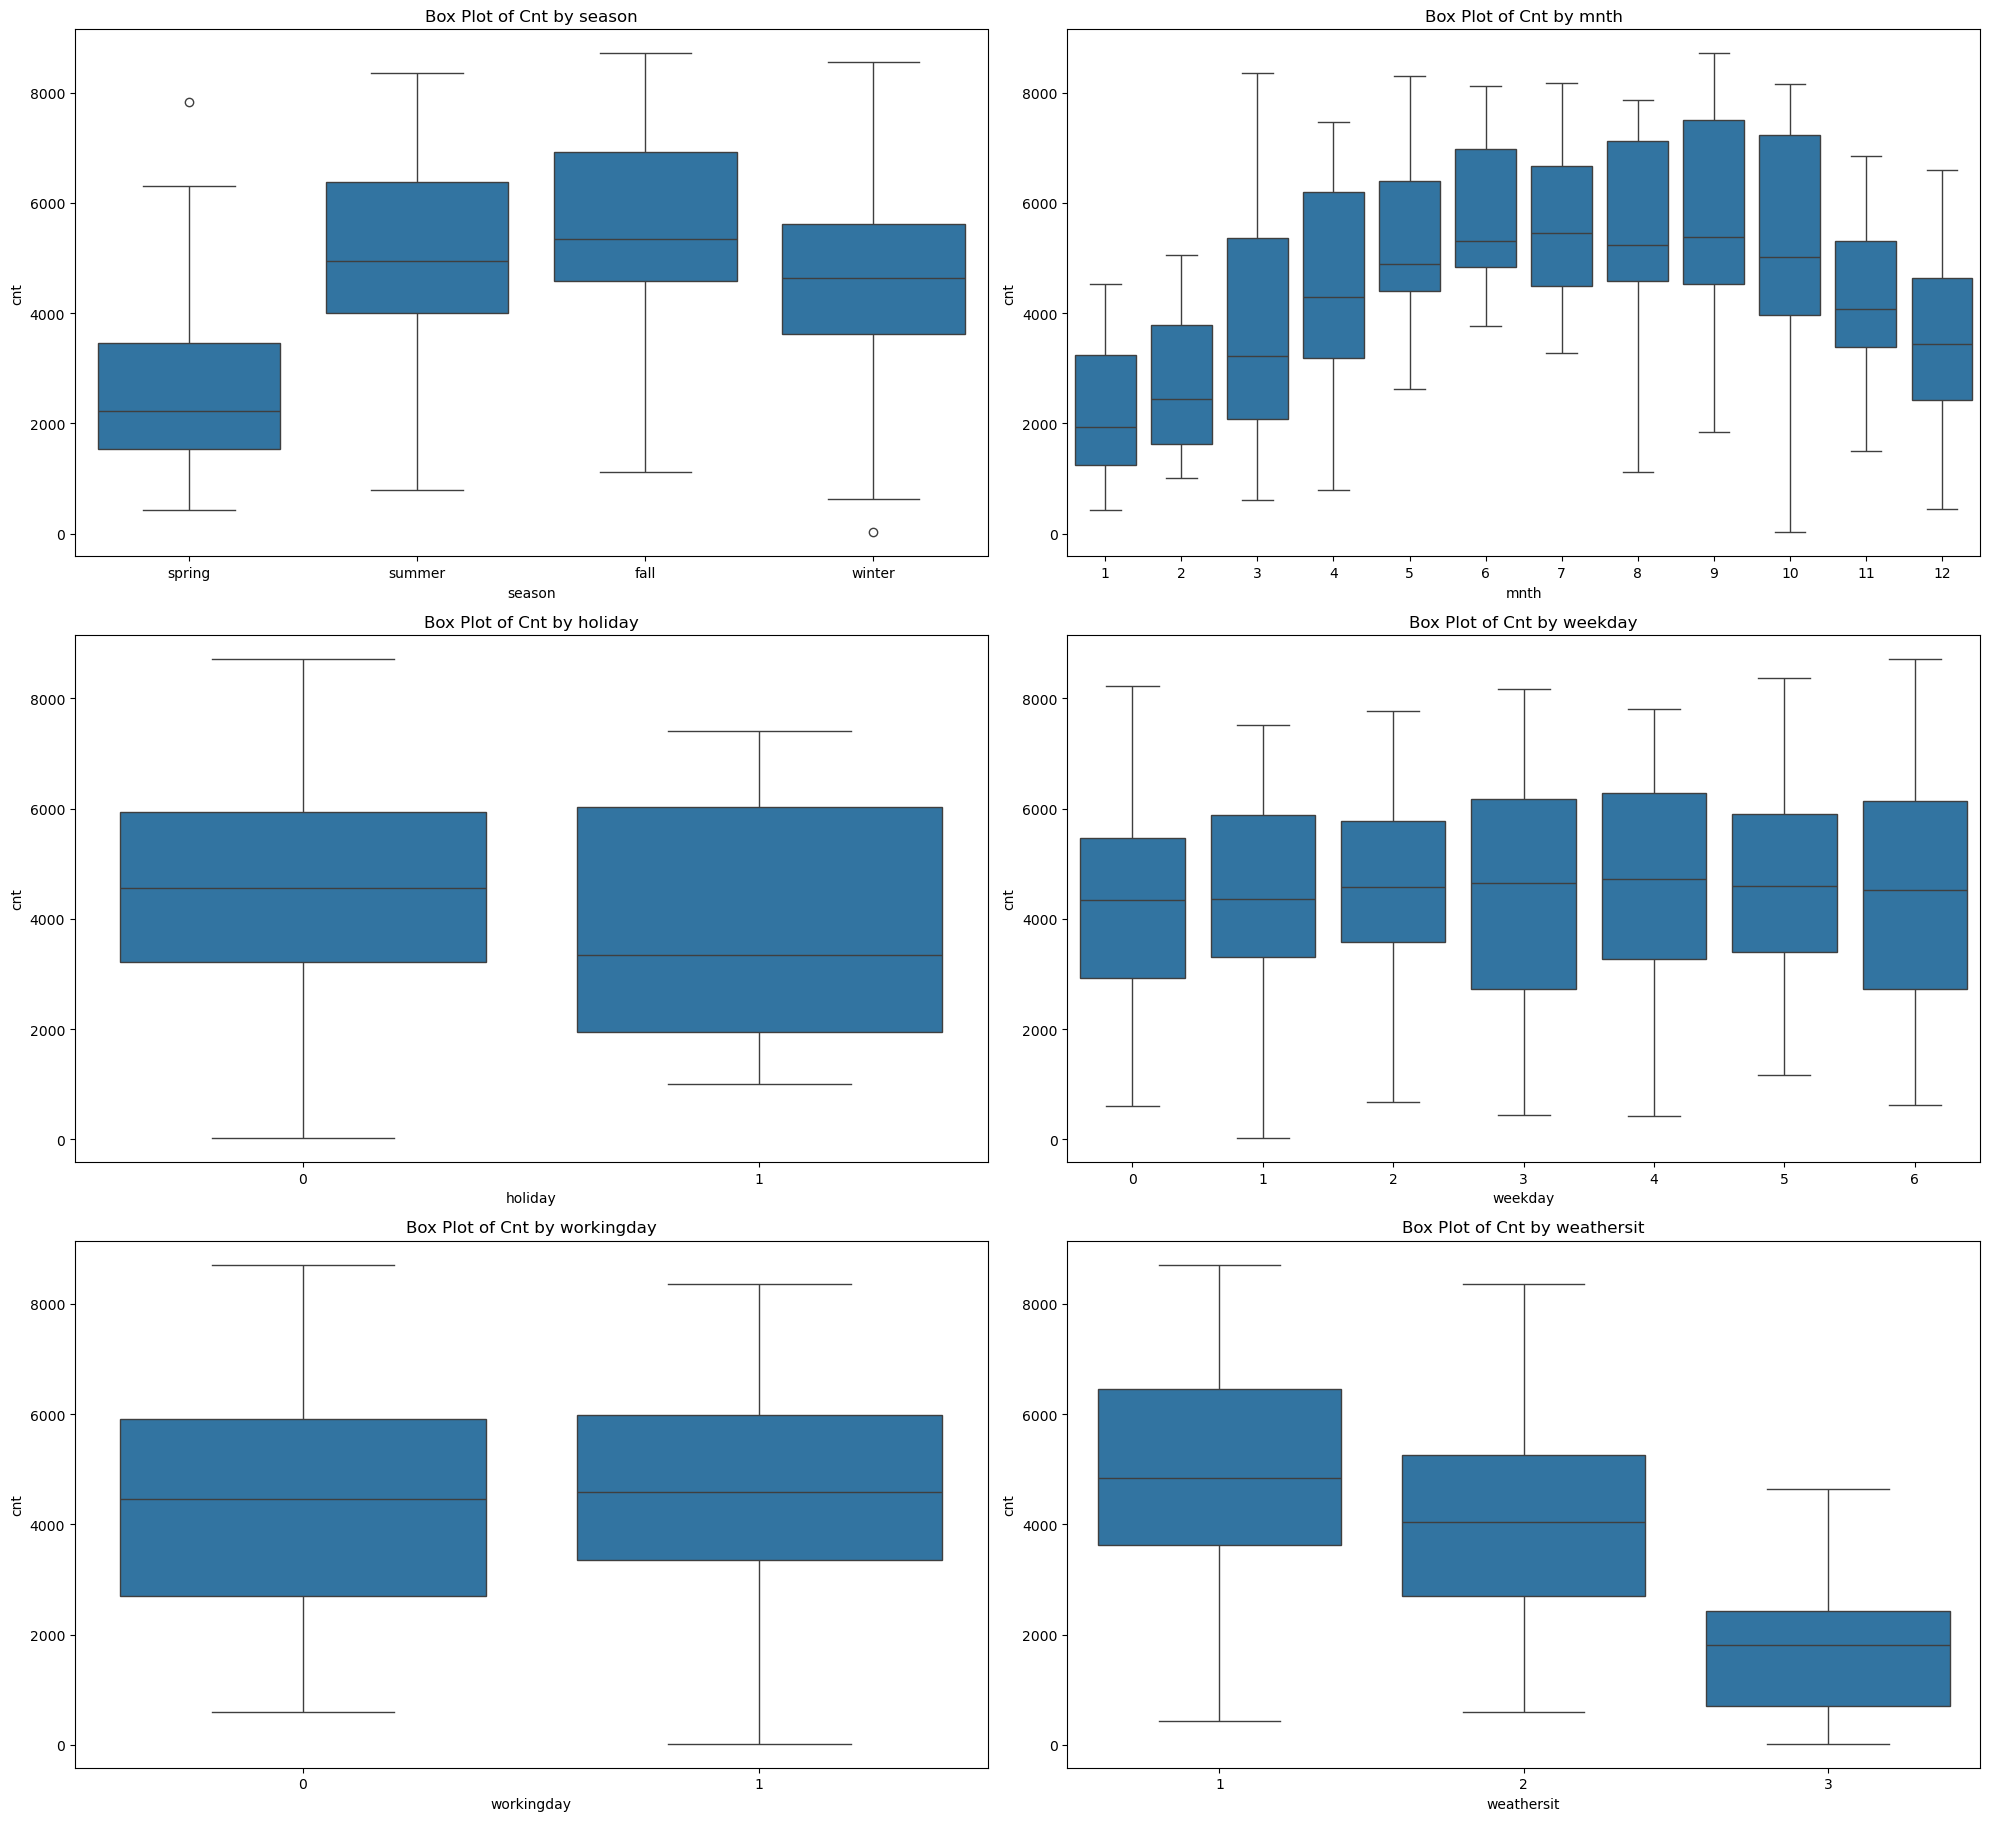

In [18]:
# categorical variables
plt.figure(figsize=(20, 30))  # Set the figure size once

# Loop through each categorical column
for index, col in enumerate(cat_cols):
    plt.subplot(5, 2, index + 1)  # Define the subplot grid (2 rows, 3 columns)
    sns.boxplot(x=col, y="cnt", data=df)  # Create the box plot
    plt.title(f"Box Plot of Cnt by {col}")  # Optional: Add a title for each plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Categorical columns observations:
- Season, weekday, month, holiday, weathersit seems to explain some variance in cnt
- one of season and month is redundant
- workingday, weekday does not seem to have an impact on cnt

### Step 3: Data Preparation
- Encoding
  - Converting 1/0
  - Other cat variables
- Splitting b/w train and test
- rescaling

In [21]:
# drop redundant cols
df  = df.drop(columns=["mnth", "atemp"])

In [22]:
# dummies need to be created for season, mnth, weekday, weathersit 
season = pd.get_dummies(df.season, drop_first=True).astype(int)
# df['mnth'] = df['mnth'].map(lambda x: calendar.month_abbr[x])
# mnth = pd.get_dummies(df.mnth, drop_first=True).astype(int)
df['weekday'] = df['weekday'].map(lambda x: calendar.day_abbr[x])
weekday = pd.get_dummies(df.weekday, drop_first=True).astype(int)
weather_map = {
    1: 'Clear',
    2: 'Mist_Cloudy',
    3: 'Light_Snow_Rain',
    4: 'Heavy_Rain_Thunderstorm'
}
# nodata for 4: Heavy Rain
df['weathersit'] = df['weathersit'].map(weather_map)
weathersit = pd.get_dummies(df.weathersit, drop_first=True).astype(int)

In [23]:
# concatenating dummy variables
df = pd.concat([df, season, weekday, weathersit], axis=1)
df = df.drop(columns=["season", "weekday", "weathersit"])
pd.set_option('display.max_columns', None)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [25]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape, df_test.shape)

(510, 18) (220, 18)


In [26]:
# Rescaling
scalar = MinMaxScaler()
num_vars = ["temp", "hum", "windspeed", "cnt"]
# Fit the data
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,1,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,0,1


### Step 5: Building a linear model

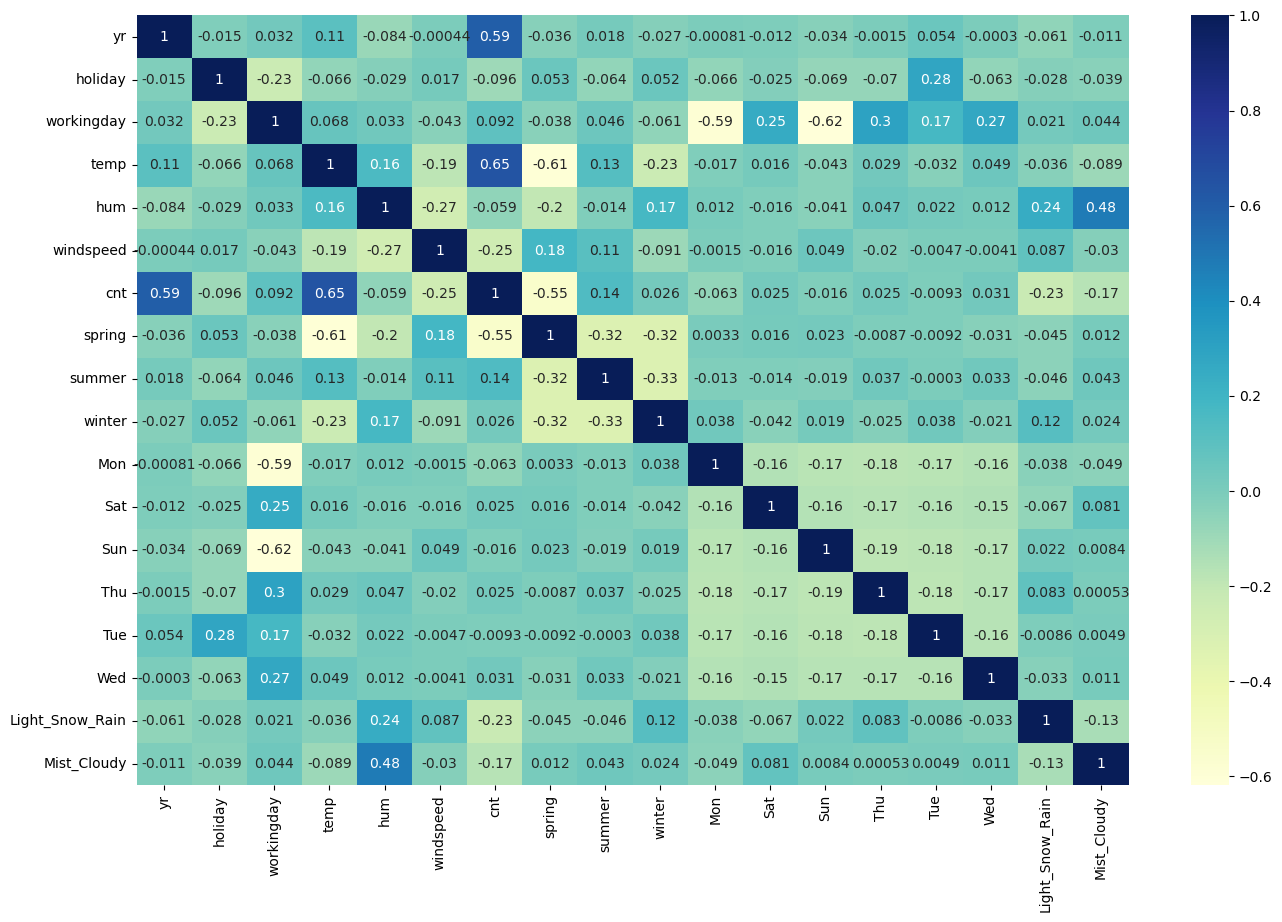

In [28]:
#heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [29]:
Y_train = df.pop("cnt")
X_train = df
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0


In [75]:
# Procedure for training model
def train(X):
    # Build a mode
    X_sm = sm.add_constant(X)
    # create model
    lr = sm.OLS(Y_train, X_sm)
    # fit the model
    lr_model = lr.fit()
    # summary
    print(lr_model.summary())

# procedure to calculate VIF
def VIF(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

# P-value- VIF approach
# High - High: Remove
# Low - Low: Retain
# High - Low : Remove forst
# Low - High : Access

In [72]:
# Significance - p-values
# VIF : how a feature variable is related to other variables
# Initial model with all variables
train(X_train)
VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     214.5
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          1.28e-259
Time:                        09:34:33   Log-Likelihood:                -5917.8
No. Observations:                 730   AIC:                         1.187e+04
Df Residuals:                     713   BIC:                         1.195e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1817.7378    228.763     

In [87]:
# Dropping Thu column
X = X_train.drop("Thu", axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          8.35e-261
Time:                        09:47:35   Log-Likelihood:                -5917.8
No. Observations:                 730   AIC:                         1.187e+04
Df Residuals:                     714   BIC:                         1.194e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1816.6282    228.149     

In [89]:
# dropping holiday
X = X.drop("holiday", axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          8.35e-261
Time:                        09:48:17   Log-Likelihood:                -5917.8
No. Observations:                 730   AIC:                         1.187e+04
Df Residuals:                     714   BIC:                         1.194e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1853.9543    341.035     

In [91]:
# dropping Sat
X = X.drop("Sat", axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     245.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          5.77e-262
Time:                        09:48:59   Log-Likelihood:                -5917.9
No. Observations:                 730   AIC:                         1.187e+04
Df Residuals:                     715   BIC:                         1.193e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1872.8926    338.149     

In [93]:
# dropping Wed
X = X.drop("Wed", axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     264.4
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          6.56e-263
Time:                        09:49:38   Log-Likelihood:                -5918.5
No. Observations:                 730   AIC:                         1.187e+04
Df Residuals:                     716   BIC:                         1.193e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1862.8421    338.097     

In [95]:
# dropping Mon
X = X.drop("Mon", axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          1.02e-263
Time:                        09:50:13   Log-Likelihood:                -5919.6
No. Observations:                 730   AIC:                         1.187e+04
Df Residuals:                     717   BIC:                         1.192e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2111.6852    288.319     

In [97]:
# dropping hum
X = X.drop("hum", axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     303.6
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.53e-261
Time:                        09:52:24   Log-Likelihood:                -5928.1
No. Observations:                 730   AIC:                         1.188e+04
Df Residuals:                     718   BIC:                         1.194e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1464.1203    244.610     

In [99]:
# dropping hum
X = X.drop("windspeed", axis = 1)
train(X)
VIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     317.4
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          6.12e-256
Time:                        09:52:56   Log-Likelihood:                -5943.7
No. Observations:                 730   AIC:                         1.191e+04
Df Residuals:                     719   BIC:                         1.196e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             995.2649    234.634     

### Step 6: Residual Analysis of the train data

### Step 7: Making Predictions Using the Final Model

### Step 8: Model Evaluation